# COMP SCI 7318 Deep Learning Fundamental - Assignment 2
Lalitphan Sae-teoh (a1932456)

In [ ]:
pip install torchinfo

In [ ]:
import random
import os
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import numpy as np

import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import torchinfo
from torchinfo import summary

## Download the dataset - CIFAR10

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, './data')

# extract the dataset
with tarfile.open('./data/cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

100%|██████████| 135M/135M [00:22<00:00, 6.13MB/s]


## Explore the dataset
There are Train & Test folder
Total 60,000 images: 6,000/classes ()

In [ ]:
data_dir = './data/cifar10'
directories = os.listdir(data_dir)
classes = os.listdir(data_dir + "/train")

for dir in directories:
  print(f"{dir.upper()} folder consists of : ")
  for cls in classes:
    print(str(cls) + ':', len(os.listdir(data_dir + f'/{dir}/' + cls)))
  print("-----------------------------------------------")

TEST folder consists of : 
cat: 1000
horse: 1000
frog: 1000
ship: 1000
airplane: 1000
truck: 1000
dog: 1000
deer: 1000
bird: 1000
automobile: 1000
-----------------------------------------------
TRAIN folder consists of : 
cat: 5000
horse: 5000
frog: 5000
ship: 5000
airplane: 5000
truck: 5000
dog: 5000
deer: 5000
bird: 5000
automobile: 5000
-----------------------------------------------


In [ ]:
# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Train dataset
train_data = ImageFolder(data_dir+'/train', transform=transform)
print(f"Training Dataset Total: {len(train_data)} images")

class_names = train_data.classes

img, label = train_data[0]
print(f"Label: {class_names[label]}, " , f"Image Shape: {img.shape}")
img

Training Dataset Total: 50000 images
Label: airplane,  Image Shape: torch.Size([3, 224, 224])


tensor([[[1.4783, 1.4783, 1.4783,  ..., 1.5125, 1.4954, 1.4954],
         [1.4783, 1.4783, 1.4783,  ..., 1.5297, 1.5125, 1.5125],
         [1.4954, 1.4954, 1.4954,  ..., 1.5297, 1.5125, 1.5125],
         ...,
         [1.3755, 1.3413, 1.3242,  ..., 2.0434, 2.0434, 2.0434],
         [1.4098, 1.3755, 1.3584,  ..., 2.0263, 2.0263, 2.0263],
         [1.4440, 1.4098, 1.3927,  ..., 2.0263, 2.0263, 2.0263]],

        [[1.6758, 1.6758, 1.6758,  ..., 1.6933, 1.6758, 1.6758],
         [1.6758, 1.6758, 1.6758,  ..., 1.6933, 1.6933, 1.6933],
         [1.6933, 1.6933, 1.6933,  ..., 1.6933, 1.6933, 1.6933],
         ...,
         [1.5357, 1.5007, 1.4832,  ..., 2.2010, 2.2010, 2.2010],
         [1.5707, 1.5357, 1.5182,  ..., 2.1835, 2.1835, 2.1835],
         [1.6057, 1.5707, 1.5532,  ..., 2.1835, 2.1835, 2.1835]],

        [[1.8034, 1.8034, 1.8034,  ..., 1.8208, 1.8034, 1.8034],
         [1.8034, 1.8034, 1.8208,  ..., 1.8208, 1.8034, 1.8034],
         [1.8208, 1.8208, 1.8383,  ..., 1.8383, 1.8208, 1.

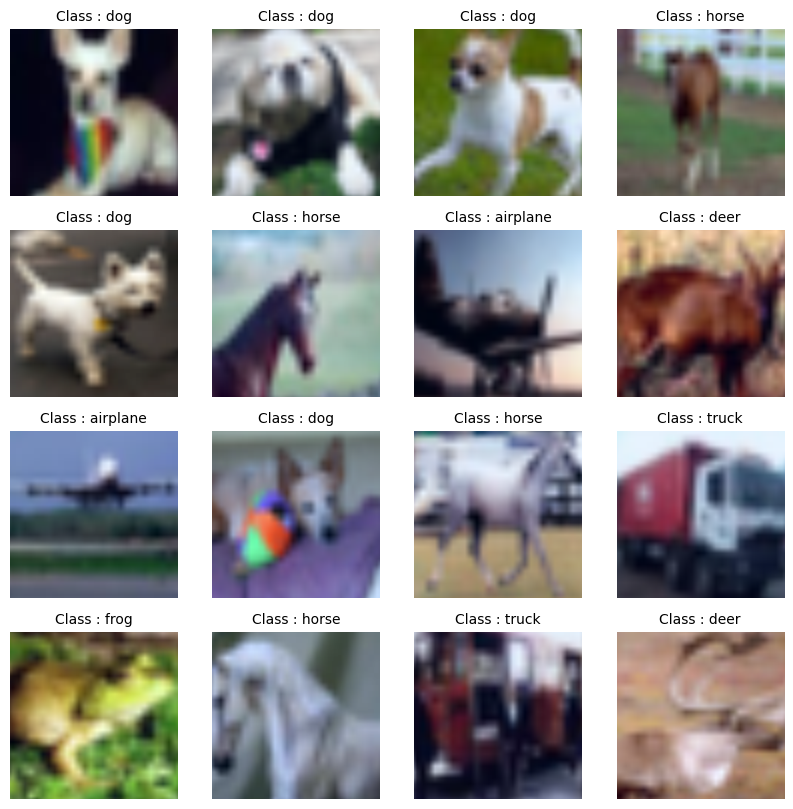

In [ ]:
rand_idx = random.sample(range(len(train_data)),k=16)

plt.figure(figsize=(10,10))

for i , idx in enumerate(rand_idx):

  img , label = train_data[idx]

  #the image tensor's range is not between 0 and 1,so we have to temporarily scale the tensor values into range 0 and 1 to prevent error.
  img = (img - img.min()) / (img.max() - img.min())

  img_class = class_names[label]

  plt.subplot(4,4,i+1)
  plt.imshow(img.permute(1,2,0))
  plt.title(f"Class : {img_class}",fontsize=10)
  plt.axis(False)

## Pre-process Data

In [ ]:
# random seed
random_seed = 2024
torch.manual_seed(random_seed)

val_size = 5000
train_size = len(train_data) - val_size

train_ds, val_ds = random_split(train_data, [train_size, val_size])
print(f"Total Train Split: {len(train_ds)}")
train_classes = [classes for data,classes in train_ds]
for i in range(10):
  print(f"Label {class_names[i]}: {train_classes.count(i)}")

print("-----------------------------------------")
print(f"Total Validation Split: {len(val_ds)}")
val_classes = [classes for data,classes in val_ds]
for i in range(10):
  print(f"Label {class_names[i]}: {val_classes.count(i)}")

Total Train Split: 45000
Label airplane: 4495
Label automobile: 4488
Label bird: 4519
Label cat: 4538
Label deer: 4491
Label dog: 4518
Label frog: 4495
Label horse: 4475
Label ship: 4480
Label truck: 4501
-----------------------------------------
Total Validation Split: 5000
Label airplane: 505
Label automobile: 512
Label bird: 481
Label cat: 462
Label deer: 509
Label dog: 482
Label frog: 505
Label horse: 525
Label ship: 520
Label truck: 499


In [ ]:
batch_size=128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

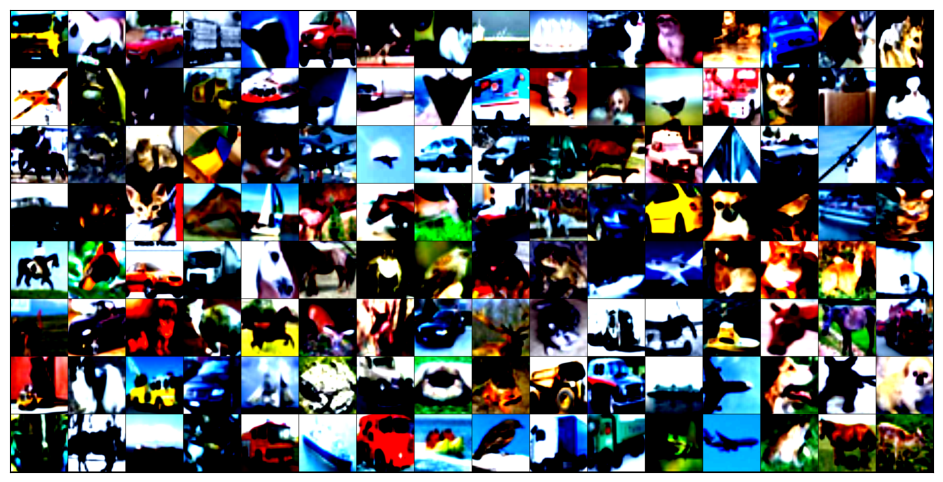

In [ ]:
show_batch(train_dl)

## Define Model

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 224, 224])
out.shape: torch.Size([128, 8, 112, 112])


In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)         # Calculate accuracy
        return {'train_loss': loss, 'train_acc': acc}

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_acc'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # First Convolutional Layer
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 32 x 112 x 112

            # Second Convolutional Layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 64 x 56 x 56

            # Third Convolutional Layer
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 128 x 28 x 28

            # Fourth Convolutional Layer
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 256 x 14 x 14

            # Fifth Convolutional Layer
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 512 x 7 x 7

            # Flatten layer
            nn.Flatten(),

            # Fully Connected Layers
            nn.Linear(512 * 7 * 7, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),  # Optional dropout for regularization
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),  # Optional dropout for regularization
            nn.Linear(512, 10)  # CIFAR-10 has 10 classes
        )

    def forward(self, xb):
        return self.network(xb)

In [ ]:
# class Cifar10CnnModel(ImageClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
#             # First Convolutional Layer
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             # Second Convolutional Layer
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             # Third Convolutional Layer
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             # Flatten layer
#             nn.Flatten(),

#             # Fully Connected Layers
#             nn.Linear(128 * 4 * 4, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 10))  # CIFAR-10 has 10 classes

#     def forward(self, xb):
#         return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
# model

In [ ]:
# summary(model, input_size=[1, 3, 32, 32])

summary(model, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10CnnModel                          [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 32, 224, 224]         896
│    └─ReLU: 2-2                         [1, 32, 224, 224]         --
│    └─MaxPool2d: 2-3                    [1, 32, 112, 112]         --
│    └─Conv2d: 2-4                       [1, 64, 112, 112]         18,496
│    └─ReLU: 2-5                         [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-6                    [1, 64, 56, 56]           --
│    └─Conv2d: 2-7                       [1, 128, 56, 56]          73,856
│    └─ReLU: 2-8                         [1, 128, 56, 56]          --
│    └─MaxPool2d: 2-9                    [1, 128, 28, 28]          --
│    └─Conv2d: 2-10                      [1, 256, 28, 28]          295,168
│    └─ReLU: 2-11                        [1, 256, 28, 28]          --
│

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images.to(next(model.parameters()).device))
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 224, 224])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0089, -0.0202,  0.0181,  0.0267, -0.0133, -0.0084,  0.0035,  0.0019,
        -0.0454, -0.0193], device='cuda:0', grad_fn=<SelectBackward0>)


## Model Helper

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=25

## Model Training

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        train_accuracies = []

        for batch in train_loader:
            model_train = model.training_step(batch)
            train_accuracies.append(model_train['train_acc'])
            loss = model_train['train_loss']
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_accuracies).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 2.3030412197113037, 'val_acc': 0.10241267830133438}

## Optimize the model - Tuning hyperparameter

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7391, train_acc: 0.3551, val_loss: 1.4063, val_acc: 0.4856
Epoch [1], train_loss: 1.3123, train_acc: 0.5299, val_loss: 1.1558, val_acc: 0.5843
Epoch [2], train_loss: 1.0687, train_acc: 0.6250, val_loss: 0.9561, val_acc: 0.6621
Epoch [3], train_loss: 0.8902, train_acc: 0.6894, val_loss: 0.9143, val_acc: 0.6840
Epoch [4], train_loss: 0.7812, train_acc: 0.7292, val_loss: 0.8037, val_acc: 0.7278
Epoch [5], train_loss: 0.6810, train_acc: 0.7624, val_loss: 0.7677, val_acc: 0.7451
Epoch [6], train_loss: 0.5907, train_acc: 0.7956, val_loss: 0.7585, val_acc: 0.7426
Epoch [7], train_loss: 0.5146, train_acc: 0.8199, val_loss: 0.7732, val_acc: 0.7463
Epoch [8], train_loss: 0.4482, train_acc: 0.8427, val_loss: 0.7872, val_acc: 0.7524
Epoch [9], train_loss: 0.3931, train_acc: 0.8610, val_loss: 0.7941, val_acc: 0.7492


In [ ]:
# function to plot loss & accuracy curve

def plot_loss_curves(results):

    loss = [x['train_loss'] for x in results]
    val_loss = [x['val_loss'] for x in results]
    train_accuracy = [x['train_acc'] for x in results]
    val_accuracy = [x['val_acc'] for x in results]

    # Figure out how many epochs there were
    epochs = range(len(loss))

    # Setup a plot
    plt.figure(figsize=(10, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.grid()
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='train_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.grid()
    plt.legend()

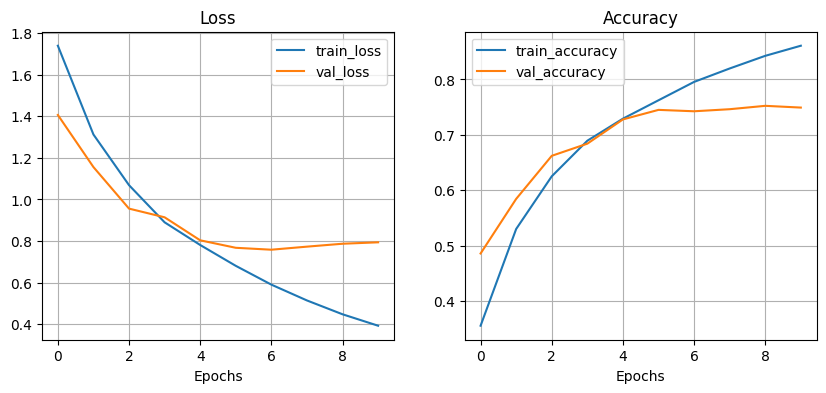

In [ ]:
plot_loss_curves(history)

## Testing with individual image

In [ ]:
# test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())
test_dataset = ImageFolder(data_dir+'/test', transform=transform)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return class_names[preds[0].item()]

Label: airplane , Predicted: ship


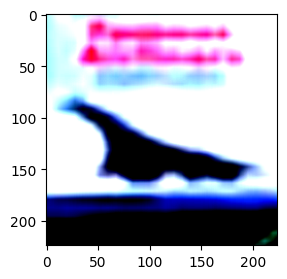

In [ ]:
img, label = test_dataset[0]
plt.figure(figsize=(5,3))
plt.imshow(img.permute(1, 2, 0))
print('Label:', class_names[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


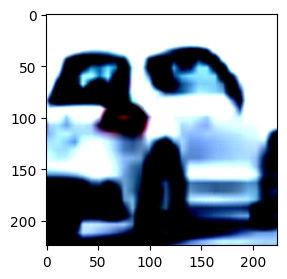

In [ ]:
img, label = test_dataset[1010]
plt.figure(figsize=(5,3))
plt.imshow(img.permute(1, 2, 0))
print('Label:', class_names[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


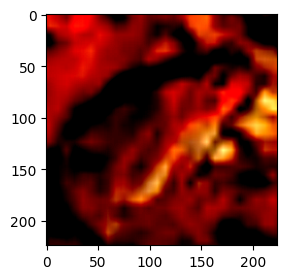

In [ ]:
img, label = test_dataset[6200]
plt.figure(figsize=(5,3))
plt.imshow(img.permute(1, 2, 0))
print('Label:', class_names[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8019430041313171, 'val_acc': 0.742480456829071}

<Axes: >

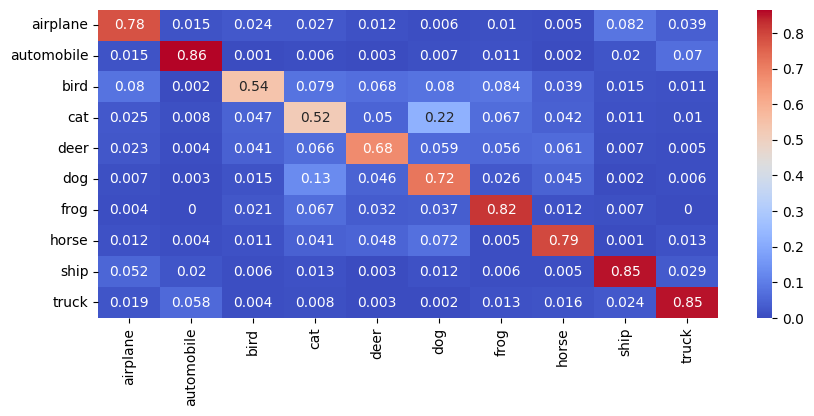

In [ ]:
## Try predicting images with our model

predicted_labels = []
actual_labels = []

model.eval()

with torch.no_grad():  # We are using no_grad instead of inference_mode for better compatibility
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    # prediction_logits = model(images.to(next(model.parameters()).device))
    prediction_logits = model(images)
    predictions = prediction_logits.argmax(dim=1).cpu().numpy()
    predicted_labels.extend(predictions)
    true_labels = labels.cpu().numpy()
    actual_labels.extend(true_labels)

confusion_mat = confusion_matrix(actual_labels, predicted_labels)
confusion_df = pd.DataFrame(confusion_mat/np.sum(confusion_mat)*10, index=class_names, columns=class_names)
plt.figure(figsize=(10,4))
sn.heatmap(confusion_df, annot=True, cmap="coolwarm")